In [2]:
# Pandas
import pandas as pd
from pandas import DataFrame, pivot_table

import datetime as dt
from faker import Faker
fake = Faker()

import numpy as np
import random

In [188]:
 def generate_random_array(n, _fct):
    array = []
    for i in range(n):
        array.append( _fct() )
        
    return pd.Series(array)


 def shake_inputs(n, data):
    array = []
    
    for i in range(n):
        random_pos = np.random.normal(50, 10) 
        random_pos = int( random_pos ) 
    
        array.append( data[ random_pos ] )
        
    return pd.Series(array)

 
countries = ['France', 'Espagne', 'United Kinkdom', 'United State', 'Italy', 'Corse', 'Suisse']
sectors = ['Automotive', 'Electrical industry', 'Chemical Industry', 'Energy industry', 'Metallurgical industry']
product_names = ['ALD Car Renting and Fleet Management',  'Asset Based Financing',  'Asset Management',  'Asset Servicing',  'Clearing Services',  'Commodities',  'Commodity Financing',  'Credit',  'Custody Services',  'Equity',  'Export Finance',  'Financing',  'Forex',  'Fund Administration',  'Fund Distribution Services',  'General Purpose Financing',  'Hybrids',  'International Retail Banking',  'Issuer Services',  'Leverage Finance',  'Life and Dammage insurance',  'Liquidity Management',  'Loans syndication',  'MCIB Financing',  'Mergers and Acquisition',  'Others',  'Prime & Clearing']

generate_date = lambda : fake.date_between(start_date="-5y", end_date="today")
generate_company = lambda : fake.company()
generate_revenus = lambda : np.random.normal(50, 28)
generate_product = lambda: product_names[ random.randint(0, len(product_names) -1) ]
generate_sector = lambda: sectors[ random.randint(0, len(sectors) -1) ]
 
    

rnd_count = 1000000
flat_data = pd.DataFrame()

rnd_companies = generate_random_array(100, generate_company).unique()
flat_data['company_name'] = shake_inputs(rnd_count, rnd_companies)
flat_data['company_id'] = pd.factorize(flat_data['company_name'])[0] + 1



flat_data['country'] = flat_data['company_id'].apply(lambda x: countries[x % len(countries)])
flat_data['sector_name'] = flat_data['company_id'].apply(lambda x: sectors[x % len(sectors)])



def generate_revenus(x):
    count_rnd_products = int(np.random.normal(5, 0.5))
    random_products = np.random.choice(product_names, count_rnd_products)
    
    x['product_name'] = np.random.choice(random_products, len(x))
    x['NBI'] = np.random.normal(50, 40, size=len(x))
    x['date'] = [ fake.date_between(start_date="-5y", end_date="today" ) for x in range(len(x))]
    
    return x

flat_data = flat_data.groupby('sector_name').apply(generate_revenus)
flat_data.query("country == 'Espagne'").head(20)


,company_name,company_id,country,sector_name,product_name,NBI,date
0,Jackson PLC,1,Espagne,Electrical industry,Export Finance,51.550912,2016-04-14
7,Johnson-Benson,8,Espagne,Energy industry,International Retail Banking,15.792594,2014-11-14
16,Pace and Sons,15,Espagne,Automotive,Life and Dammage insurance,104.602346,2019-07-29
26,Diaz-Waters,22,Espagne,Chemical Industry,Liquidity Management,95.514514,2018-09-08
33,Pace and Sons,15,Espagne,Automotive,Clearing Services,-9.035303,2017-07-13
44,Diaz-Waters,22,Espagne,Chemical Industry,Life and Dammage insurance,120.091183,2018-03-03
46,Diaz-Waters,22,Espagne,Chemical Industry,Fund Distribution Services,69.891284,2018-10-25
47,Price Ltd,29,Espagne,Metallurgical industry,Issuer Services,37.127621,2015-11-17
56,Johnson-Benson,8,Espagne,Energy industry,International Retail Banking,53.181798,2016-07-12
59,Pace and Sons,15,Espagne,Automotive,Fund Distribution Services,88.353363,2017-10-22


In [193]:
flat_data.groupby('company_name').agg('sector_name').unique()

company_name
Allen-Smith                                [Energy industry]
Anderson, Reynolds and White               [Energy industry]
Arnold-Camacho                           [Chemical Industry]
Baker Inc                                  [Energy industry]
Baker PLC                                [Chemical Industry]
Becker-Anderson                        [Electrical industry]
Brown-Jones                                [Energy industry]
Brown-Wheeler                              [Energy industry]
Bruce-Martinez                      [Metallurgical industry]
Cain Group                                 [Energy industry]
Calderon-Ramirez                    [Metallurgical industry]
Carpenter, Adams and Taylor                [Energy industry]
Charles, Mckee and Wright           [Metallurgical industry]
Cherry-Hall                         [Metallurgical industry]
Church and Sons                          [Chemical Industry]
Davis LLC                                [Chemical Industry]
Davis, Schw

In [189]:
flat_data.to_csv('../ressources/data/financial_sells_{0}.csv'.format(rnd_count))

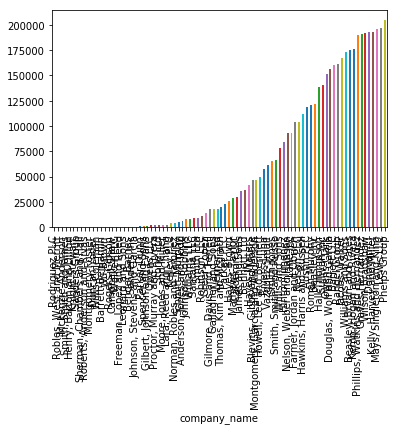

In [178]:
flat_data.groupby('company_name').agg('NBI').sum().sort_values().plot.bar()